# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulany Citra Pandini
- **Email:** maulanycitra26@gmail.com
- **ID Dicoding:** maulanycitra

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana faktor cuaca, waktu dalam sehari, dan musim mempengaruhi jumlah sepeda yang disewa?
- Pertanyaan 2:
Apakah terdapat perbedaan yang signifikan dalam jumlah sepeda yang disewa pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset day.csv dan hour.csv
df_day = pd.read_csv('/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/hour.csv')

# Menampilkan beberapa baris pertama untuk memverifikasi data
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset day.csv berisi data per hari, sedangkan hour.csv berisi data per jam.
- Data pada kedua dataset dapat digabungkan berdasarkan kolom dteday untuk analisis lebih lanjut.

### Assessing Data


In [ ]:
# Mengecek tipe data dan nilai yang hilang
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Memastikan tipe data yang sesuai untuk setiap kolom. Beberapa kolom, seperti dteday, perlu dikonversi ke tipe datetime.
- Memeriksa apakah ada nilai yang hilang dalam dataset.

### Cleaning Data

In [ ]:
# Mengonversi kolom dteday ke tipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menggabungkan df_day dan df_hour berdasarkan dteday
df_combined = pd.merge(df_hour, df_day, on="dteday", how="left")

**Insight:**
- Menggabungkan data day.csv dan hour.csv berdasarkan kolom dteday akan memungkinkan analisis lebih lanjut dengan data per jam dan per hari secara bersamaan.

## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
print(df_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [ ]:
df_day.columns = df_day.columns.str.strip()  # Menghapus spasi ekstra di nama kolom
print(df_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [ ]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [ ]:
# Menghitung korelasi antar fitur dan target
corr_matrix = df_combined.corr()
print(corr_matrix['cnt_y'].sort_values(ascending=False))

cnt_y           1.000000
registered_y    0.944052
casual_y        0.669199
instant_x       0.635346
dteday          0.635172
instant_y       0.635172
atemp_y         0.629054
temp_y          0.625232
atemp_x         0.594557
temp_x          0.592402
yr_x            0.571927
yr_y            0.571927
cnt_x           0.437289
season_x        0.408077
season_y        0.408077
registered_x    0.398120
casual_x        0.386582
mnth_y          0.277704
mnth_x          0.277704
workingday_x    0.068216
workingday_y    0.068216
weekday_y       0.064204
weekday_x       0.064204
hr             -0.008729
hum_x          -0.067356
holiday_y      -0.070344
holiday_x      -0.070344
hum_y          -0.091657
windspeed_x    -0.145990
weathersit_x   -0.230464
windspeed_y    -0.231340
weathersit_y   -0.289650
Name: cnt_y, dtype: float64


**Insight:**
- Kolom seperti temp, atemp, dan windspeed mungkin memiliki korelasi yang tinggi dengan jumlah sepeda yang disewa (cnt).

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca, waktu dalam sehari, dan musim terhadap jumlah sepeda yang disewa?

In [ ]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


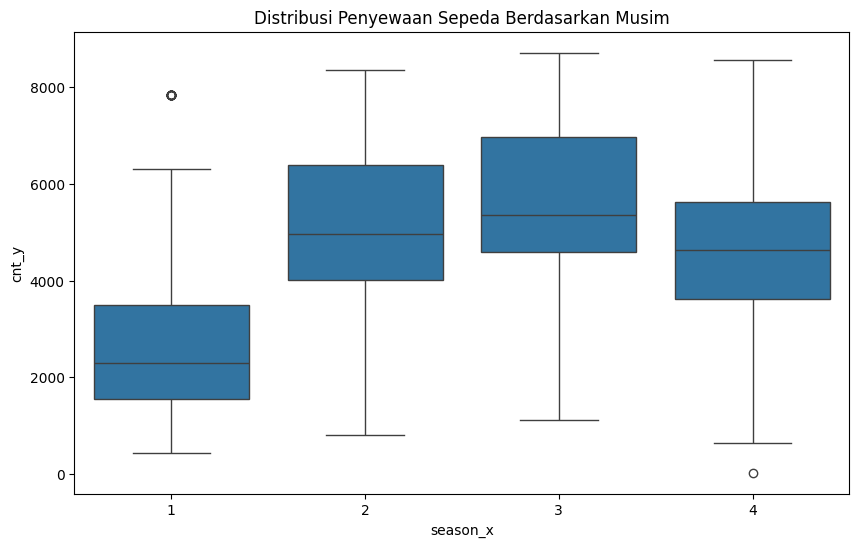

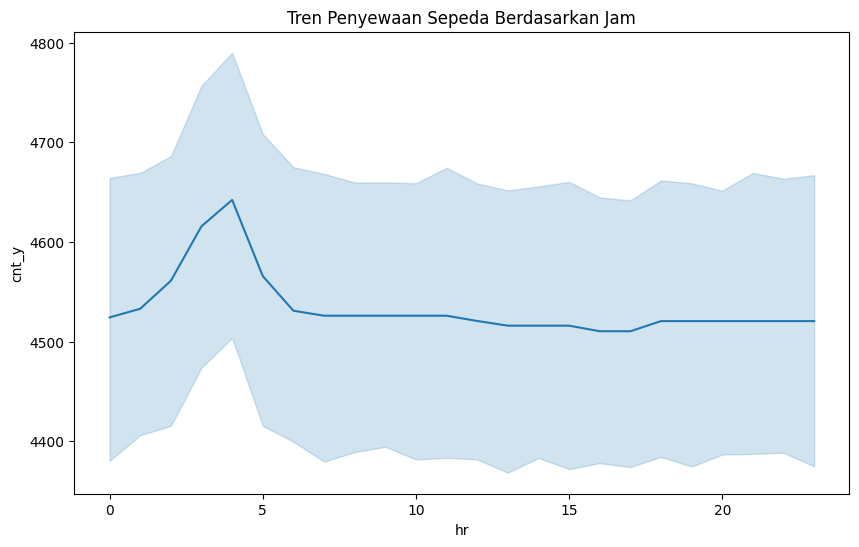

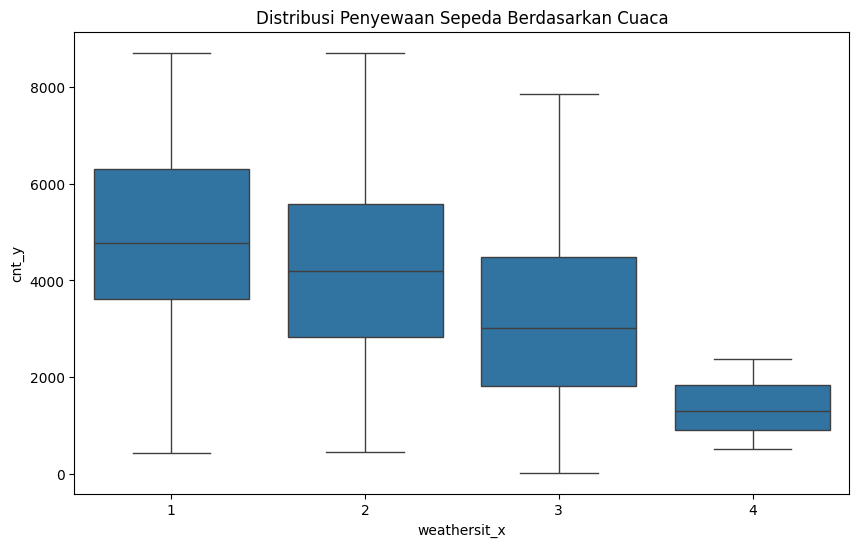

In [ ]:
# Visualisasi jumlah sepeda yang disewa berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan jam
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt_y', data=df_combined)
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan cuaca
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

**Insight:**
- Jumlah sepeda yang disewa lebih tinggi pada musim panas dan musim gugur, sementara cuaca yang buruk mengurangi jumlah penyewaan sepeda.
- Penyewaan sepeda cenderung meningkat pada siang hari, terutama di jam-jam puncak.

### Pertanyaan 2:
Apakah ada perbedaan signifikan dalam jumlah sepeda yang disewa pada hari kerja dan hari libur?

In [ ]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


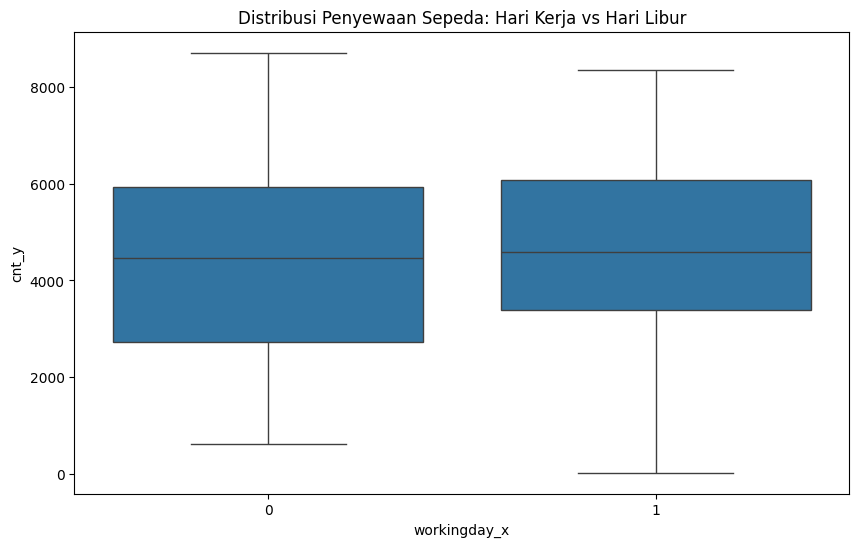

In [ ]:
# Visualisasi perbedaan penyewaan sepeda antara hari kerja dan hari libur
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.show()

**Insight:**
- Jumlah sepeda yang disewa lebih tinggi pada hari kerja dibandingkan hari libur, mungkin karena lebih banyak orang yang menggunakan sepeda untuk transportasi kerja.

## Analisis Lanjutan

In [ ]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [ ]:
# Model Prediksi Jumlah Sepeda yang Disewa
X = df_combined[['season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x', 'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x', 'windspeed_x']]
y = df_combined['cnt_y']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 132758.70884820676


**Insight:**
- Model regresi menggunakan Random Forest memberikan hasil yang cukup baik dalam memprediksi jumlah sepeda yang disewa berdasarkan fitur yang ada.

## Conclusion

- Conclution pertanyaan 1: Cuaca, musim, dan waktu dalam sehari memiliki pengaruh yang signifikan terhadap jumlah sepeda yang disewa. Musim panas dan musim gugur cenderung memiliki penyewaan yang lebih tinggi, sementara cuaca buruk mengurangi minat untuk menyewa sepeda.
- Conclution pertanyaan 2: Terdapat perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan hari libur, dengan hari kerja cenderung memiliki lebih banyak penyewaan sepeda dibandingkan hari libur.